
**First things first** - please go to 'File' and select 'Save a copy in Drive' so that you have your own version of this activity set up and ready to use.
Remember to update the portfolio index link to your own work once completed!

# Mini-project 5.3 Detecting the anomalous activity of a ship’s engine

**Detecting the anomalous activity of a ship’s engine!**

A poorly maintained ship engine in the supply chain industry can lead to inefficiencies, increased fuel consumption, higher risks of malfunctions, and potential safety hazards. Your challenge in this project is to apply critical thinking and ML concepts to design and implement a robust anomaly detection model.

<br></br>

## **Business context**
You are provided with a real data set to identify anomalous activity in a ship’s engine functionality (Devabrat,  2022). As you work through this project, keep in mind that, typically speaking, anomalies would make up a minority of the data points (i.e., about 1% to 5% of the data points would be anomalies).

The data set contains six important features continuously monitored to evaluate the engine's status as ‘good’ or ‘bad’. These features are:
- **Engine rpm (revolutions per minute):** A high rpm indicates the engine is operating at a higher speed than designed for prolonged periods, which can lead to overheating, excessive wear, and eventual failure. A low rpm could signal a lack of power, issues with fuel delivery, or internal mechanical problems.
- **Lubrication oil pressure:** Low lubrication oil pressure indicates insufficient lubrication, leading to increased friction, overheating, and engine damage. A high lubrication oil pressure could signal a blockage in the oil delivery system, potentially causing seal or gasket failure.
- **Fuel pressure:** High fuel pressure can cause poor engine performance and incomplete combustion, indicating fuel pump or filter issues. A low fuel pressure may result in excessive fuel consumption, poor emissions, or damage to the fuel injectors.
- **Coolant pressure:** Low coolant pressure indicates a potential leak in the cooling system or a coolant pump failure, risking engine overheating. A high coolant pressure could be a sign of a blockage in the cooling system or a failing head gasket, which can also lead to overheating.
- **Lubrication oil temperature:** High lubrication oil temperature suggests the oil is overheating, which can degrade its lubricating properties and lead to engine damage. A low lubrication oil temperature may indicate it is not reaching its optimal operating temperature, potentially causing inadequate lubrication.
- **Coolant temperature:** High coolant temperature signals overheating, which various issues, including a failed thermostat, coolant leak, or insufficient coolant flow can cause. A low coolant temperature could suggest the engine is not reaching its optimal operating temperature, affecting performance and efficiency.

Issues with engines could lead to engine malfunctions, potential safety hazards, and downtime (e.g. delayed deliveries), resulting in the breakdown of a ship’s overall functionality, consequently impacting the business, such as affecting revenue via failure to deliver goods. By predicting timely maintenance, the business aims to increase profit by reducing downtime, reducing safety risks for the crew, limiting fuel consumption, and increasing customer satisfaction through timely deliveries.

Your task is to develop a robust anomaly detection system to protect a company’s shipping fleet by evaluating engine functionality. Therefore, you’ll explore the data and:
- employ preprocessing and feature engineering
- perform model training, anomaly detection, post-processing, and refinement.

You must prepare a report illustrating your insights to the prospective stakeholders, showing how your solution will save the business money and build trust with its stakeholders. At this stage of the project, the main question you need to consider is:
- What insights can be gained from the data, and what recommendations can be made to the company based on these insights? For example, which features need to be monitored closely, and what are the thresholds for anomalous observations? Which statistical or ML technique is the best for anomaly detection based on **this data set**, and which feature (univariate approach) or combination of features (multivariate approach) can predict maintenance?

<br></br>

> **Disclaimer**
>
> Please note that although a real-life data set was provided, the business context in this project is fictitious. Any resemblance to companies and persons (living or dead) is coincidental. The course designers and hosts assume no responsibility or liability for any errors or omissions in the content of the business context and data sets. The information in the data sets is provided on an 'as is' basis with no guarantees of completeness, accuracy, usefulness, or timeliness.

<br></br>

## **Objective**

In the Notebook, I:
- explore the data set
- preprocess the data and conduct feature engineering
- apply statistical techniques to detect anomalies
- use ML algorithms to detect anomalies.

You will also write a report summarising the results of your findings and recommendations.

<br></br>

## **Assessment criteria**
By completing this project, you will be able to provide evidence that you can:
- demonstrate enhanced problem-solving skills and proposed strategic solutions by systematically analysing complex organisational challenges
- identify meaningful patterns in complex data to evidence advanced critical and statistical thinking skills
- select statistical techniques appropriate to a solutions design approach and evidence the ability to evaluate their effectiveness
- demonstrate enhanced data representation and improved model performance by systematically implementing relevant techniques
- design innovative solutions through critically selecting, evaluating and implementing effective unsupervised learning techniques.

<br></br>

> Start your activity here. Select the pen from the toolbar to add your entry.

In [ ]:
from IPython.display import Image, display
from PIL import Image as PILImage
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest


##Rubric

## 1. Intial Data Exploration and Assessment

In [ ]:
# URL of the dataset
url = 'https://raw.githubusercontent.com/fourthrevlxd/cam_dsb/main/engine.csv'

# Read the CSV into a DataFrame
df = pd.read_csv(url)
df_clean = pd.read_csv(url) # Untouch df, spare

# Display the DataFrame
print(df.head())

   Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0         682          2.391656       4.617196          2.848982   
1         605          5.466877       6.424361          5.727520   
2         658          3.434232       3.680896          1.678708   
3         749          2.094656       7.120927          1.639670   
4         676          3.538228       5.956472          3.225336   

   lub oil temp  Coolant temp  
0     76.272417     69.884609  
1     73.222679     74.907314  
2     88.089916     78.704806  
3     77.661625     82.386700  
4     75.226352     67.153220  


In [ ]:
df.shape

(19535, 6)

### 1.1 Checks for Missing or duplicate data values

In [ ]:
# instal and partake in a pandas profiling report to obtain a general assessment of the data
!pip install -U ydata-profiling
import ydata_profiling
from ydata_profiling  import ProfileReport

profile = ydata_profiling.ProfileReport(df)

profile.to_notebook_iframe()

profile.to_file("Anom_ship_engine_activity.html")

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 97.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=49dd928a5205d12f8ae254c11d511586fc8cd58e757c755fc26a53bf230c42c5
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Figure 1

*Using a Pandas profiling report we can obtain an overall analysis of the data, looking at the Dataset statistics, we can see there are no missing data cells or duplicate rows. Also there do not seem to be any correlated values, therefore it is unlikely there is any multicolinearity*


In [ ]:
# Check the data types in the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 915.8 KB


### 1.2 Generate descriptive statistics of the data

In [ ]:
# descrition of data frame
df.describe().round(2)

Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
count    19535.00          19535.00       19535.00          19535.00   
mean       791.24              3.30           6.66              2.34   
std        267.61              1.02           2.76              1.04   
min         61.00              0.00           0.00              0.00   
25%        593.00              2.52           4.92              1.60   
50%        746.00              3.16           6.20              2.17   
75%        934.00              4.06           7.74              2.85   
max       2239.00              7.27          21.14              7.48   

       lub oil temp  Coolant temp  
count      19535.00      19535.00  
mean          77.64         78.43  
std            3.11          6.21  
min           71.32         61.67  
25%           75.73         73.90  
50%           76.82         78.35  
75%           78.07         82.92  
max           89.58        195.53

Figure 2

### 1.3 Documentation of Mean and Medians for each feature and their insights

*Figure 2 produces both the mean and the median (50%)*

**Engine RPM**

Mean: 791.24

Median: 746.0

The mean is creater than the median. This suggests the data distribution is right-skewed (positively skewed).

The fact that the mean is noticeably higher than the median indicates the presence of higher values that skew the data.

The std (267.61) indicates moderate variability in engine RPM

**Lubricant oil pressure**

Mean: 3.30

Median: 3.16

The mean and median are similar in values implying a near-symmetric distribution.

A pressure range of 0 to 7.27, suggests that there might be anomalies or specific engine conditions.

**Fuel Pressure**


Mean: 6.66

Median: 6.20

The mean and median are similar, suggesting a symertical distribution however the mean is slightly higher than the median. This implies a right skewness.

The std is relatively high compared to the mean, indicating significant variation in fuel pressure values.

**Coolant Pressure**

Mean: 2.34

Median: 2.17

The mean and median are similar suggesting is symertrical distribution with a gentle right skew.

**Lubrication Oil Temperature**

Mean: 77.64

Median: 76.82

A similar mean and median suggesting a symmetrical distribution.

A small std, implies low data variance.

**Coolant Temperature**

Mean: 78.43

Median: 78.35

The mean and median are nearly identical, indicating a symmetric distribution.
The std is relatively small compared to the mean, implying low data variance.

## 1.4 Range of Values beyond the 95th percentile

In [ ]:
# Calculate the 95th percentile and max of each value
perc_95_rpm = np.percentile(df['Engine rpm'], 95)
max_rpm = df['Engine rpm'].max()

perc_95_lub_oil_pres = np.percentile(df['Lub oil pressure'], 95)
max_lub_oil_pres = df['Lub oil pressure'].max()

perc_95_fuel_pres = np.percentile(df['Fuel pressure'], 95)
max_fuel_pres = df['Fuel pressure'].max()

perc_95_cool_pres = np.percentile(df['Coolant pressure'], 95)
max_cool_pres = df['Coolant pressure'].max()

perc_95_lub_oil_temp = np.percentile(df['lub oil temp'], 95)
max_lub_oil_temp = df['lub oil temp'].max()

perc_95_cool_temp = np.percentile(df['Coolant temp'], 95)
max_cool_temp = df['Coolant temp'].max()

#Print range of values beyond the 95th percentile and the max
print('range values beyond 95th percentile rpm:', perc_95_rpm,'-', max_rpm)
print('range values beyond 95th percentile lub oil pres:', perc_95_lub_oil_pres,'-', max_lub_oil_pres)
print('range values beyond 95th percentile fuel pres:', perc_95_fuel_pres,'-', max_fuel_pres)
print('range values beyond 95th percentile coolant pres:', perc_95_cool_pres,'-', max_cool_pres)
print('range values beyond 95th percentile lub oil temp:', perc_95_lub_oil_temp,'-', max_lub_oil_temp)
print('range values beyond 95th percentile coolant temp',perc_95_cool_temp,'-',max_cool_temp)

range values beyond 95th percentile rpm: 1324.0 - 2239
range values beyond 95th percentile lub oil pres: 5.0580398327 - 7.265565536
range values beyond 95th percentile fuel pres: 12.208474577999997 - 21.13832551
range values beyond 95th percentile coolant pres: 4.438414563599999 - 7.478504946
range values beyond 95th percentile lub oil temp: 84.94077776900001 - 89.58079551
range values beyond 95th percentile coolant temp 88.612891046 - 195.5279116


## 1.5 Visualisation of the data

**Histograms**

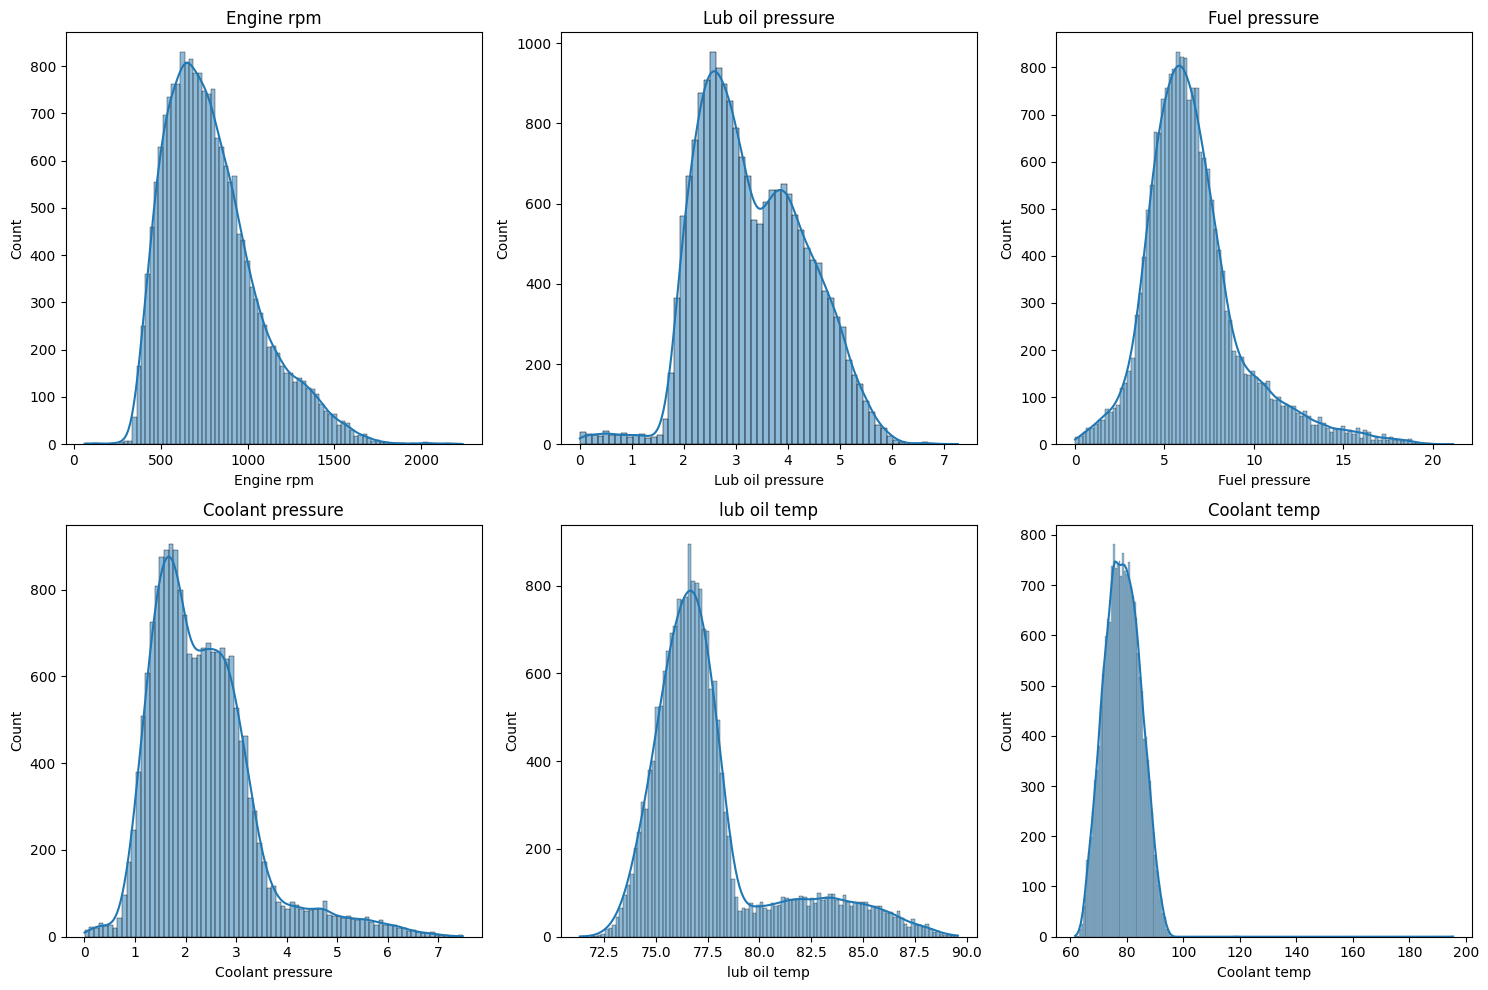

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each feature in a separate subplot
for i, column in enumerate(df.columns):
    sns.histplot(data=df, x=column, kde=True, ax=axes[i])  # Plot histogram with KDE
    axes[i].set_title(column)  # Set title for each subplot

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the figure
plt.show()

Figure 3

Most of the features appear to be relatively normally distributed. Coolant temperature, engine rpm and fuel pressure appear to be the most normal.

coolant pressure, lubricant oil pressuire and lubricant oil temperature, are heavily skewed and show a common irregulatrity where they have a second dip towards the right end of the graph.

**Boxplots**

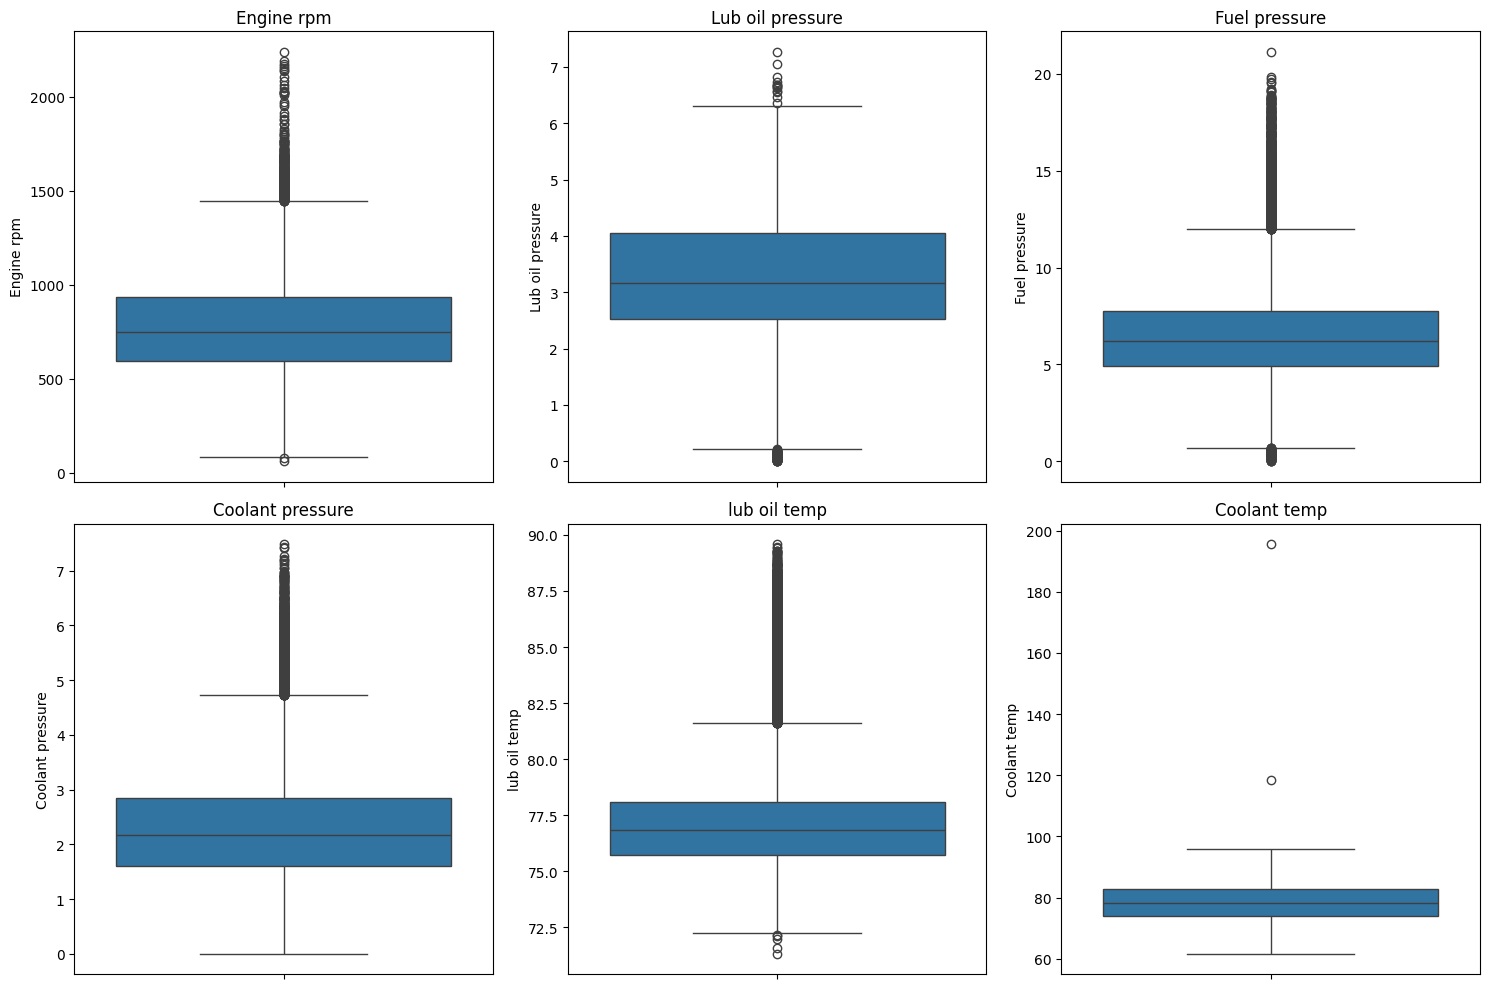

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each feature in a separate subplot
for i, column in enumerate(df.columns):
    sns.boxplot(data=df, y=column, ax=axes[i])  # Plot histogram with KDE
    axes[i].set_title(column)  # Set title for each subplot

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the figure
plt.show()

Figure 4

The boxplot has intentified many anomalies.

Coolant temperature appears to only have two anomalies whereas the other feautres have many. They appear to be towards the higher values.

## 2. Anomaly Detection: Satistical Methods

### 2.1 Calculate IQR for each variable

In [ ]:
# Generate descriptive statistics and round the values
desc_stats = df.describe().round(2)

# Extract the 25th percentile (Q1) and 75th percentile (Q3)
q1 = desc_stats.loc["25%"]  # Extract the 25th percentile row
q3 = desc_stats.loc["75%"]  # Extract the 75th percentile row

# Calculate the IQR for each feature
iqr = q3 - q1

# Print the results
print("25th Percentile (Q1):")
print(q1)

print("\n75th Percentile (Q3):")
print(q3)

print("\nInterquartile Range (IQR):")
print(iqr)

# store individual Q1 values in variables
q1_engine_rpm = q1["Engine rpm"]
q1_lub_oil_pres = q1["Lub oil pressure"]
q1_fuel_pres = q1["Fuel pressure"]
q1_cool_pres = q1["Coolant pressure"]
q1_lub_oil_temp = q1["lub oil temp"]
q1_cool_temp = q1["Coolant temp"]


# store individual Q3 values in variables
q3_engine_rpm = q3["Engine rpm"]
q3_lub_oil_pres = q3["Lub oil pressure"]
q3_fuel_pres = q3["Fuel pressure"]
q3_cool_pres = q3["Coolant pressure"]
q3_lub_oil_temp = q3["lub oil temp"]
q3_cool_temp = q3["Coolant temp"]

# store individual IQR values in variables
iqr_engine_rpm = iqr["Engine rpm"]
iqr_lub_oil_pres = iqr["Lub oil pressure"]
iqr_fuel_pres = iqr["Fuel pressure"]
iqr_cool_pres = iqr["Coolant pressure"]
iqr_lub_oil_temp = iqr["lub oil temp"]
iqr_cool_temp = iqr["Coolant temp"]



25th Percentile (Q1):
Engine rpm          593.00
Lub oil pressure      2.52
Fuel pressure         4.92
Coolant pressure      1.60
lub oil temp         75.73
Coolant temp         73.90
Name: 25%, dtype: float64

75th Percentile (Q3):
Engine rpm          934.00
Lub oil pressure      4.06
Fuel pressure         7.74
Coolant pressure      2.85
lub oil temp         78.07
Coolant temp         82.92
Name: 75%, dtype: float64

Interquartile Range (IQR):
Engine rpm          341.00
Lub oil pressure      1.54
Fuel pressure         2.82
Coolant pressure      1.25
lub oil temp          2.34
Coolant temp          9.02
dtype: float64


### 2.2 Calculating upper and lower limits for outlier detection

In [ ]:
# Filtering the outliers.
# Calculate the lower limits.
lower_engine_rpm = q1_engine_rpm - (1.5 * iqr_engine_rpm)
lower_lub_oil_pres = q1_lub_oil_pres - (1.5 * iqr_lub_oil_pres)
lower_fuel_pres = q1_fuel_pres - (1.5 * iqr_fuel_pres)
lower_cool_pres = q1_cool_pres - (1.5 * iqr_cool_pres)
lower_lub_oil_temp = q1_lub_oil_temp - (1.5 * iqr_lub_oil_temp)
lower_cool_temp = q1_cool_temp - (1.5 * iqr_cool_temp)

# Calculate the upper limits.
upper_engine_rpm = q3_engine_rpm + (1.5 * iqr_engine_rpm)
upper_lub_oil_pres = q3_lub_oil_pres + (1.5 * iqr_lub_oil_pres)
upper_fuel_pres = q3_fuel_pres + (1.5 * iqr_fuel_pres)
upper_cool_pres = q3_cool_pres + (1.5 * iqr_cool_pres)
upper_lub_oil_temp = q3_lub_oil_temp + (1.5 * iqr_lub_oil_temp)
upper_cool_temp = q3_cool_temp + (1.5 * iqr_cool_temp)

# View the lower limits.
print("Lower engine rpm limit: ", lower_engine_rpm)
print("Lower lub oil pressure limit: ", lower_lub_oil_pres)
print("Lower fuel pressure limit: ", lower_fuel_pres)
print("Lower coolant pressure limit: ", lower_cool_pres)
print("Lower lub oil temp limit: ", lower_lub_oil_temp)
print("Lower coolant temp limit: ", lower_cool_temp)

#gap
print()

# View the upper limits
print("Upper engine rpm limit: ", upper_engine_rpm)
print("Upper lub oil pressure limit: ", upper_lub_oil_pres)
print("Upper fuel pressure limit: ", upper_fuel_pres)
print("Upper coolant pressure limit: ", upper_cool_pres)
print("Upper lub oil temp limit: ", upper_lub_oil_temp)
print("Upper coolant temp limit: ", upper_cool_temp)


Lower engine rpm limit:  81.5
Lower lub oil pressure limit:  0.2100000000000004
Lower fuel pressure limit:  0.6899999999999995
Lower coolant pressure limit:  -0.2749999999999999
Lower lub oil temp limit:  72.22000000000003
Lower coolant temp limit:  60.37000000000001

Upper engine rpm limit:  1445.5
Upper lub oil pressure limit:  6.369999999999999
Upper fuel pressure limit:  11.97
Upper coolant pressure limit:  4.725
Upper lub oil temp limit:  81.57999999999998
Upper coolant temp limit:  96.44999999999999


## 2.3 Create New dataframe that shows anomamly detection

In [ ]:
# copy dataframe
df_new = df
df_new.head()

Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0         682          2.391656       4.617196          2.848982   
1         605          5.466877       6.424361          5.727520   
2         658          3.434232       3.680896          1.678708   
3         749          2.094656       7.120927          1.639670   
4         676          3.538228       5.956472          3.225336   

   lub oil temp  Coolant temp  
0     76.272417     69.884609  
1     73.222679     74.907314  
2     88.089916     78.704806  
3     77.661625     82.386700  
4     75.226352     67.153220

# 2.4 New columns indicating outliers for each feature

In [ ]:
#Create new columns indicating outliers for each feature
df_new['Engine rpm Outlier'] = (df_new['Engine rpm'] < lower_engine_rpm) | (df_new['Engine rpm'] > upper_engine_rpm)
df_new['Lub oil pressure Outlier'] = (df_new['Lub oil pressure'] < lower_lub_oil_pres) | (df_new['Lub oil pressure'] > upper_lub_oil_pres)
df_new['Fuel pressure Outlier'] = (df_new['Fuel pressure'] < lower_fuel_pres) | (df_new['Fuel pressure'] > upper_fuel_pres)
df_new['Coolant pressure Outlier'] = (df_new['Coolant pressure'] < lower_cool_pres) | (df_new['Coolant pressure'] > upper_cool_pres)
df_new['Lub Oil Temp Outlier'] = (df_new['lub oil temp'] < lower_lub_oil_temp) | (df_new['lub oil temp'] > upper_lub_oil_temp)
df_new['Coolant Temp Outlier'] = (df_new['Coolant temp'] < lower_cool_temp) | (df_new['Coolant temp'] > upper_cool_temp)

# Print the updated DataFrame
df_new.head()

Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0         682          2.391656       4.617196          2.848982   
1         605          5.466877       6.424361          5.727520   
2         658          3.434232       3.680896          1.678708   
3         749          2.094656       7.120927          1.639670   
4         676          3.538228       5.956472          3.225336   

   lub oil temp  Coolant temp  Engine rpm Outlier  Lub oil pressure Outlier  \
0     76.272417     69.884609               False                     False   
1     73.222679     74.907314               False                     False   
2     88.089916     78.704806               False                     False   
3     77.661625     82.386700               False                     False   
4     75.226352     67.153220               False                     False   

   Fuel pressure Outlier  Coolant pressure Outlier  Lub Oil Temp Outlier  \
0                  False                     False                 False   
1                  False                      True                 False   
2                  False                     False                  True   
3                  False                     False                 False   
4                  False                     False                 False   

   Coolant Temp Outlier  
0                 False  
1                 False  
2                 False  
3                 False  
4                 False

In [ ]:
df_new.shape

(19535, 12)

# 2.5 Convert booleans into intergers

In [ ]:
#Convert new columns into intergers
df_new['Engine rpm Outlier'] = df_new['Engine rpm Outlier'].astype(int)
df_new['Lub oil pressure Outlier'] = df_new['Lub oil pressure Outlier'].astype(int)
df_new['Fuel pressure Outlier'] = df_new['Fuel pressure Outlier'].astype(int)
df_new['Lub Oil Temp Outlier'] = df_new['Lub Oil Temp Outlier'].astype(int)
df_new['Coolant Temp Outlier'] = df_new['Coolant Temp Outlier'].astype(int)
df_new['Coolant pressure Outlier'] = df_new['Coolant pressure Outlier'].astype(int)
#
df_new.head()

Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0         682          2.391656       4.617196          2.848982   
1         605          5.466877       6.424361          5.727520   
2         658          3.434232       3.680896          1.678708   
3         749          2.094656       7.120927          1.639670   
4         676          3.538228       5.956472          3.225336   

   lub oil temp  Coolant temp  Engine rpm Outlier  Lub oil pressure Outlier  \
0     76.272417     69.884609                   0                         0   
1     73.222679     74.907314                   0                         0   
2     88.089916     78.704806                   0                         0   
3     77.661625     82.386700                   0                         0   
4     75.226352     67.153220                   0                         0   

   Fuel pressure Outlier  Coolant pressure Outlier  Lub Oil Temp Outlier  \
0                      0                         0                     0   
1                      0                         1                     0   
2                      0                         0                     1   
3                      0                         0                     0   
4                      0                         0                     0   

   Coolant Temp Outlier  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0

#2.6 Use IQR to identify a sample as an outlier only if 1 or more of the features that fall beyond limits

In [ ]:
#Add an outlier count column
df_new['Outlier Count'] = df_new[['Engine rpm Outlier','Lub oil pressure Outlier', 'Fuel pressure Outlier','Coolant pressure Outlier', 'Lub Oil Temp Outlier', 'Coolant Temp Outlier']].sum(axis=1)

# Add a column to identify the sample as an outlier, as it has two or more features that beyond limits
df_new['Is Outlier? (1)'] = (df_new['Outlier Count'] >= 1).astype(int)
df_new['Is Outlier? (2)'] = (df_new['Outlier Count'] >= 2).astype(int)
df_new['Is Outlier? (3)'] = (df_new['Outlier Count'] >= 3).astype(int)
df_new.head()

Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0         682          2.391656       4.617196          2.848982   
1         605          5.466877       6.424361          5.727520   
2         658          3.434232       3.680896          1.678708   
3         749          2.094656       7.120927          1.639670   
4         676          3.538228       5.956472          3.225336   

   lub oil temp  Coolant temp  Engine rpm Outlier  Lub oil pressure Outlier  \
0     76.272417     69.884609                   0                         0   
1     73.222679     74.907314                   0                         0   
2     88.089916     78.704806                   0                         0   
3     77.661625     82.386700                   0                         0   
4     75.226352     67.153220                   0                         0   

   Fuel pressure Outlier  Coolant pressure Outlier  Lub Oil Temp Outlier  \
0                      0                         0                     0   
1                      0                         1                     0   
2                      0                         0                     1   
3                      0                         0                     0   
4                      0                         0                     0   

   Coolant Temp Outlier  Outlier Count  Is Outlier? (1)  Is Outlier? (2)  \
0                     0              0                0                0   
1                     0              1                1                0   
2                     0              1                1                0   
3                     0              0                0                0   
4                     0              0                0                0   

   Is Outlier? (3)  
0                0  
1                0  
2                0  
3                0  
4                0

# 2.7 Percentage of data set labelled as an outliers per requirement

In [ ]:
# Calculate value_counts for each column
outlier_1_counts = df_new['Is Outlier? (1)'].value_counts(1)  # Normalize into percentages
outlier_2_counts = df_new['Is Outlier? (2)'].value_counts(1)
outlier_3_counts = df_new['Is Outlier? (3)'].value_counts(1)

# Combine the results into a single DataFrame
outlier_summary = pd.concat(
    [outlier_1_counts, outlier_2_counts, outlier_3_counts],
    axis=1,
    keys=['Outlier (1)', 'Outlier (2)', 'Outlier (3)']
)

# Rename columns for better clarity
outlier_summary.columns = ['Features with 1 Outlier', 'Features with 2 Outliers', 'Features with 3 Outlier']

# Display the combined summary
print(outlier_summary)


   Features with 1 Outlier  Features with 2 Outliers  Features with 3 Outlier
0                 0.762324                  0.978398                 0.999437
1                 0.237676                  0.021602                 0.000563


The number of features that must simultaneously be in outlier
condition, in order for a sample to be classified as an outlier, such that the
total percentage of samples identified as outliers falls within the 1-5% range.

The table above shows that if a sample has one feature, the amount of outliers in the data set would be around 24%. This is no within the 1-5% range.

Therefore we look at samples that have two features that are outliers. This amounts to 2% of samples in the data set. This is within the range and would be considered an acceptable criteria for this model.

Features with three outliers were less than 0.1% and would not be useful for outlier dection.


## 2.8 THOUGHTS AND OBSERVATIONS

IQR has it strenghs in its simplicity, robustness against extreme values and provides insight into feature. However it does have some limitations being it sees each feature individually, which for features share  iteractions, it can't see the common interdependencies. IQR also assumes normal distribution, althought the data is close to normal distribution, some features are better than others. This technique wouldn't be appropriate considering the costs and safety at stake.

IQR is better suited as an exploration device or as part of a hybrid approach for anomaly detection.

# 3. Anomaly Dectection: Machine learning (ML) models

SVM

Copy original data frame

In [ ]:
df2 = pd.read_csv(url)
df2.head()

Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0         682          2.391656       4.617196          2.848982   
1         605          5.466877       6.424361          5.727520   
2         658          3.434232       3.680896          1.678708   
3         749          2.094656       7.120927          1.639670   
4         676          3.538228       5.956472          3.225336   

   lub oil temp  Coolant temp  
0     76.272417     69.884609  
1     73.222679     74.907314  
2     88.089916     78.704806  
3     77.661625     82.386700  
4     75.226352     67.153220

## 3.1 Features in the Dataset are scaled to improve performance

In [ ]:
scaler = StandardScaler()

# Scale the data
df3 = scaler.fit_transform(df2)  # Scaled data is now a NumPy array and df3 is a scaled version of df2
df3_scaled = df3 # spare DataFrame
# Convert back to DataFrame
df3 = pd.DataFrame(df3, columns=df2.columns, index=df2.index)
df3_scaled = pd.DataFrame(df3, columns=df2.columns, index=df2.index)  # Use df2's columns and index
df3

Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0       -0.408212         -0.892819      -0.738304          0.495596   
1       -0.695950          2.117332      -0.083759          3.273154   
2       -0.497896          0.127697      -1.077426         -0.633625   
3       -0.157842         -1.183534       0.168533         -0.671293   
4       -0.430633          0.229492      -0.253226          0.858747   
...           ...               ...            ...               ...   
19530   -0.411949          0.288774       0.233701         -1.208058   
19531   -0.789372         -1.038290      -0.511826         -0.833709   
19532   -0.654845          0.006141      -1.038745          3.537070   
19533    1.389218         -0.559945      -1.069205          0.594695   
19534   -0.359633         -0.771998      -0.108714          0.340808   

       lub oil temp  Coolant temp  
0         -0.440709     -1.376412  
1         -1.421047     -0.567158  
2          3.358026      0.044690  
3          0.005852      0.637913  
4         -0.776966     -1.816491  
...             ...           ...  
19530     -0.461752     -1.382184  
19531     -0.243824      1.397013  
19532     -0.563698     -1.000134  
19533     -0.276059      0.478951  
19534     -0.028127     -1.171553  

[19535 rows x 6 columns]

## 3.2 One-Class SVM used for outlier detection

In [ ]:
# Fit the One-Class SVM using all scaled features
oc_svm = OneClassSVM(kernel='rbf', gamma=0.1, nu=0.5)  # Adjust parameters as needed
oc_svm.fit(df3)


OneClassSVM(gamma=0.1, nu=0.05)

In [ ]:
# Predict anomalies
df3['Anomaly'] = oc_svm.predict(df3)  # Outputs -1 for anomalies, 1 for normal data

# Analyse results
print(df3['Anomaly'].value_counts(1))

Anomaly
 1    0.949936
-1    0.050064
Name: proportion, dtype: float64


**Using PCA we can reduce the features from 6D to 2D, so it can be plotted**

*This is an easier way to visually understand how the classes are separated, however this is a projection and not the true separation in the original which is in 6-dimensional space. This is a 2D representation of the 6D SVM*


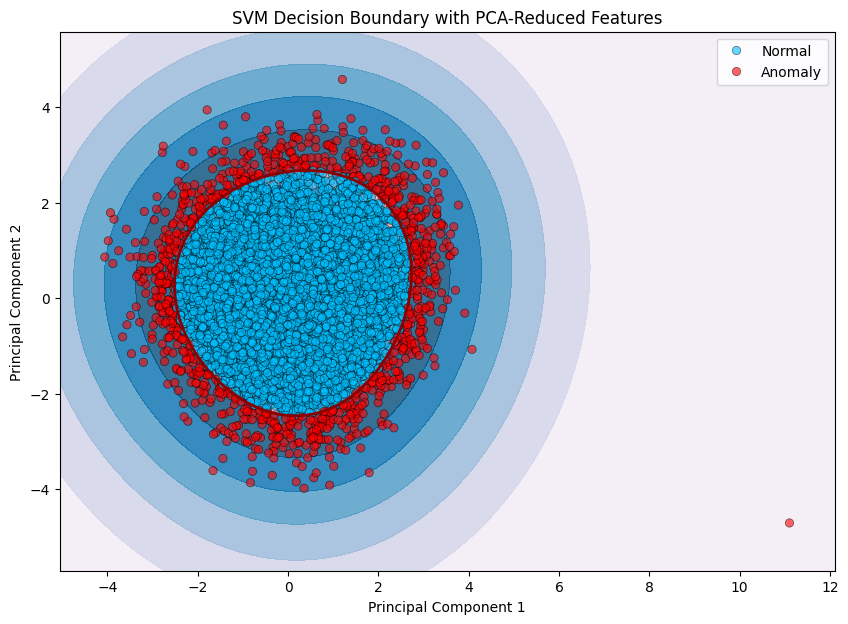

In [ ]:
# Reduce dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df3_scaled)  # Convert 6D to 2D

# Fit the One-Class SVM
oc_svm = OneClassSVM(kernel='rbf', gamma=0.1, nu=0.1)
oc_svm.fit(X_pca)

# Visualize the SVM Decision Boundary
def plot_model(model, X_scaled, title):
    # Create a grid for the decision boundary
    xx, yy = np.meshgrid(np.linspace(X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1, 500),
                         np.linspace(X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1, 500))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Predict anomalies
    y_pred = model.predict(X_scaled)

    # Plot setup
    plt.figure(figsize=(10, 7))
    plt.title(title)

    # Plot decision function and boundary
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu, alpha=0.8)
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
    plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred', alpha=0.5)

    # Plot data points
    sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1],
                    hue=np.where(y_pred == 1, 'Normal', 'Anomaly'),
                    palette={'Normal': 'deepskyblue', 'Anomaly': 'red'},
                    alpha=0.6, edgecolor='k')

    # Plot labels
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()

# Call the plotting function
plot_model(oc_svm, X_pca, "SVM Decision Boundary with PCA-Reduced Features")

*Figure 5*

So using gamma=0.1, nu=0.05 we obtained an anomaly percentage of 12.9%. This is above the requried 1-5%. So the parameters must be adjusted.

The next attempt we will increase the gamma value.

## 3.3 Model settings adjusted for SVM to obtain the expected range of outliers

 Attempt 2

In [ ]:
# Fit the One-Class SVM using all scaled features
oc_svm = OneClassSVM(kernel='rbf', gamma=0.5, nu=0.1)  # parameters adjusted
oc_svm.fit(df3)

OneClassSVM(gamma=0.5, nu=0.1)

In [ ]:
# Predict anomalies
df3['Anomaly'] = oc_svm.predict(df3)  # Outputs -1 for anomalies, 1 for normal data

# Analyse results
print(df3['Anomaly'].value_counts(1))

Anomaly
 1    0.898439
-1    0.101561
Name: proportion, dtype: float64


Increasing the gamma value to 0.5 got us to an anomaly percentage of 10.2%, which is closer to the criteria, however still out of tolerance. Therefore, values must be adjust again.

Although increasing the gamma did get us closer to the target, using the graph below, it appears the SVM model is too sensitive, therefore it should be decreased.

This time both the gamma and nu values will be reduced.

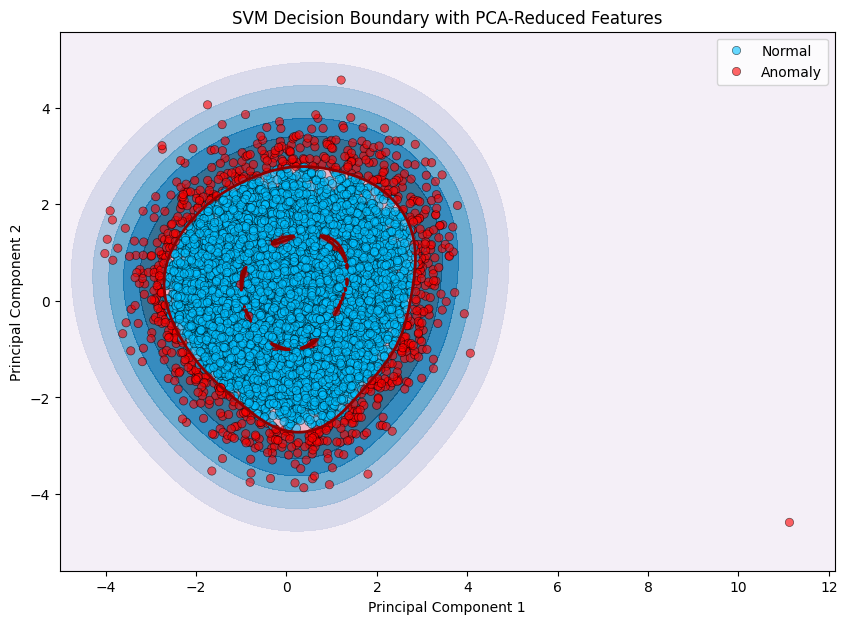

In [ ]:
# Reduce dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df3_scaled)  # Convert 6D to 2D, df3_scaled used as df3 contains 'anomaly' column

# Fit the One-Class SVM
oc_svm = OneClassSVM(kernel='rbf', gamma=0.5, nu=0.1)
oc_svm.fit(X_pca)

# Visualize the SVM Decision Boundary
def plot_model(model, X_scaled, title):
    # Create a grid for the decision boundary
    xx, yy = np.meshgrid(np.linspace(X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1, 500),
                         np.linspace(X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1, 500))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Predict anomalies
    y_pred = model.predict(X_scaled)

    # Plot setup
    plt.figure(figsize=(10, 7))
    plt.title(title)

    # Plot decision function and boundary
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu, alpha=0.8)
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
    plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred', alpha=0.5)

    # Plot data points
    sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1],
                    hue=np.where(y_pred == 1, 'Normal', 'Anomaly'),
                    palette={'Normal': 'deepskyblue', 'Anomaly': 'red'},
                    alpha=0.6, edgecolor='k')

    # Plot labels
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()

# Call the plotting function
plot_model(oc_svm, X_pca, "SVM Decision Boundary with PCA-Reduced Features")

*Figure 6*

**Attempt 3**

In [ ]:
# Fit the One-Class SVM using all scaled features
oc_svm = OneClassSVM(kernel='rbf', gamma=0.3, nu=0.05)  # parameters adjusted
oc_svm.fit(df3)

OneClassSVM(gamma=0.3, nu=0.05)

In [ ]:
# Predict anomalies
df3['Anomaly'] = oc_svm.predict(df3)  # Outputs -1 for anomalies, 1 for normal data

# Analyse results
print(df3['Anomaly'].value_counts(1))

Anomaly
 1    0.949475
-1    0.050525
Name: proportion, dtype: float64


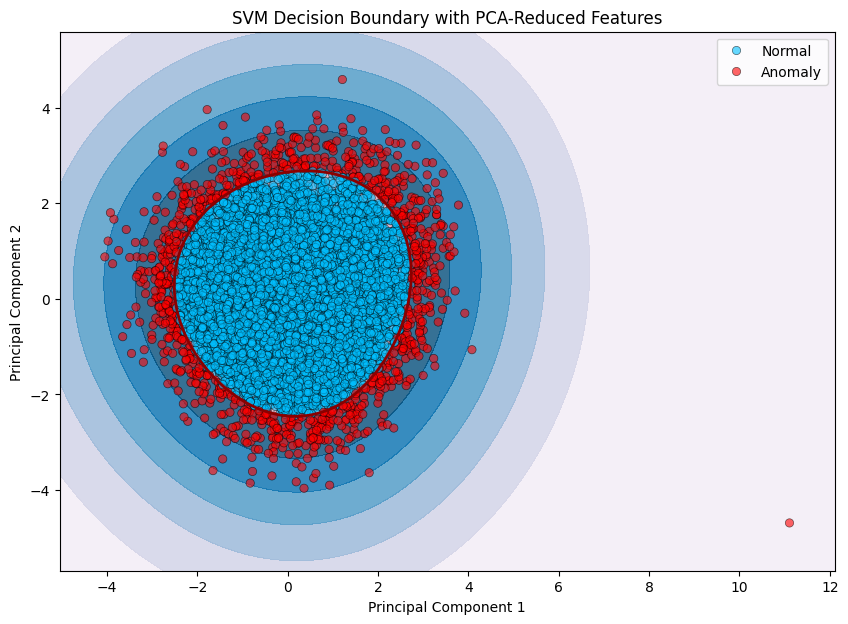

In [ ]:
# Reduce dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df3_scaled)  # Convert 6D to 2D

# Fit the One-Class SVM
oc_svm = OneClassSVM(kernel='rbf', gamma=0.3, nu=0.05)
oc_svm.fit(X_pca)

# Visualize the SVM Decision Boundary
def plot_model(model, X_scaled, title):
    # Create a grid for the decision boundary
    xx, yy = np.meshgrid(np.linspace(X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1, 500),
                         np.linspace(X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1, 500))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Predict anomalies
    y_pred = model.predict(X_scaled)

    # Plot setup
    plt.figure(figsize=(10, 7))
    plt.title(title)

    # Plot decision function and boundary
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu, alpha=0.8)
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
    plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred', alpha=0.5)

    # Plot data points
    sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1],
                    hue=np.where(y_pred == 1, 'Normal', 'Anomaly'),
                    palette={'Normal': 'deepskyblue', 'Anomaly': 'red'},
                    alpha=0.6, edgecolor='k')

    # Plot labels
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()

# Call the plotting function
plot_model(oc_svm, X_pca, "SVM Decision Boundary with PCA-Reduced Features")

*Figure 7*

This values provide an outlier percentage of 5% or 5.1% depending on the amount of significant figures. This is not safely withing the criteria, so the parameters will be adjusted again.

**Attempt 4**

In [ ]:
# Fit the One-Class SVM using all scaled features
oc_svm = OneClassSVM(kernel='rbf', gamma=0.3, nu=0.01)  # parameters adjusted
oc_svm.fit(df3)

OneClassSVM(gamma=0.3, nu=0.01)

In [ ]:
# Predict anomalies
df3['Anomaly'] = oc_svm.predict(df3)  # Outputs -1 for anomalies, 1 for normal data

# Analyse results
print(df3['Anomaly'].value_counts(1))

Anomaly
 1    0.978244
-1    0.021756
Name: proportion, dtype: float64


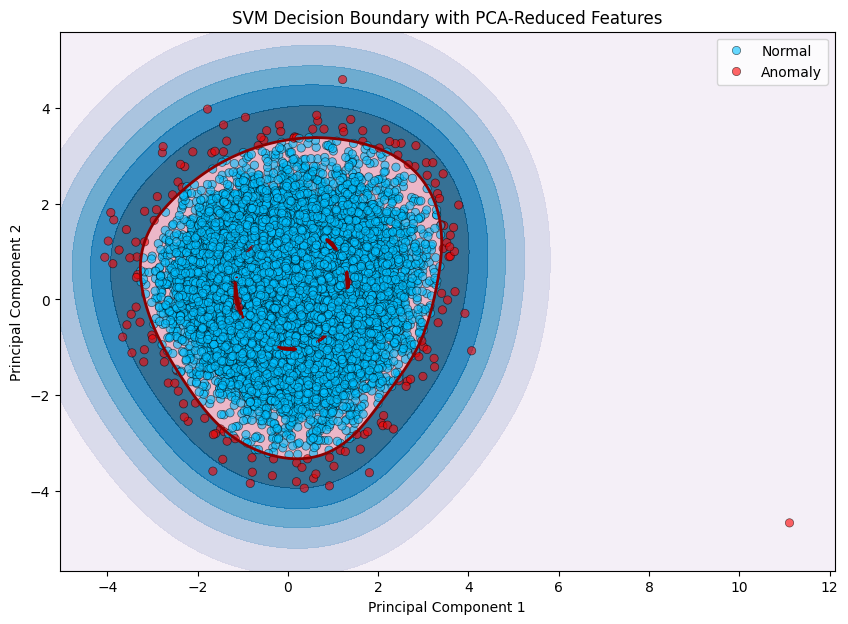

In [ ]:
# Reduce dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df3_scaled)  # Convert 6D to 2D

# Fit the One-Class SVM
oc_svm = OneClassSVM(kernel='rbf', gamma=0.3, nu=0.01)
oc_svm.fit(X_pca)

# Visualize the SVM Decision Boundary
def plot_model(model, X_scaled, title):
    # Create a grid for the decision boundary
    xx, yy = np.meshgrid(np.linspace(X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1, 500),
                         np.linspace(X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1, 500))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Predict anomalies
    y_pred = model.predict(X_scaled)

    # Plot setup
    plt.figure(figsize=(10, 7))
    plt.title(title)

    # Plot decision function and boundary
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu, alpha=0.8)
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
    plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred', alpha=0.5)

    # Plot data points
    sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1],
                    hue=np.where(y_pred == 1, 'Normal', 'Anomaly'),
                    palette={'Normal': 'deepskyblue', 'Anomaly': 'red'},
                    alpha=0.6, edgecolor='k')

    # Plot labels
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()

# Call the plotting function
plot_model(oc_svm, X_pca, "SVM Decision Boundary with PCA-Reduced Features")

*Figure 8*

*These values are within the 1-5% anomaly requriement. Although the values fit, this graph does show some signs of overfitting, therefore the gamma will be reduced again.*

**Attempt 5**

In [ ]:
# Fit the One-Class SVM using all scaled features
oc_svm = OneClassSVM(kernel='rbf', gamma=0.1, nu=0.01)  # parameters adjusted
oc_svm.fit(df3)

OneClassSVM(gamma=0.1, nu=0.01)

In [ ]:
# Predict anomalies
df3['Anomaly'] = oc_svm.predict(df3)  # Outputs -1 for anomalies, 1 for normal data

# Analyse results
print(df3['Anomaly'].value_counts(1))

Anomaly
 1    0.989762
-1    0.010238
Name: proportion, dtype: float64


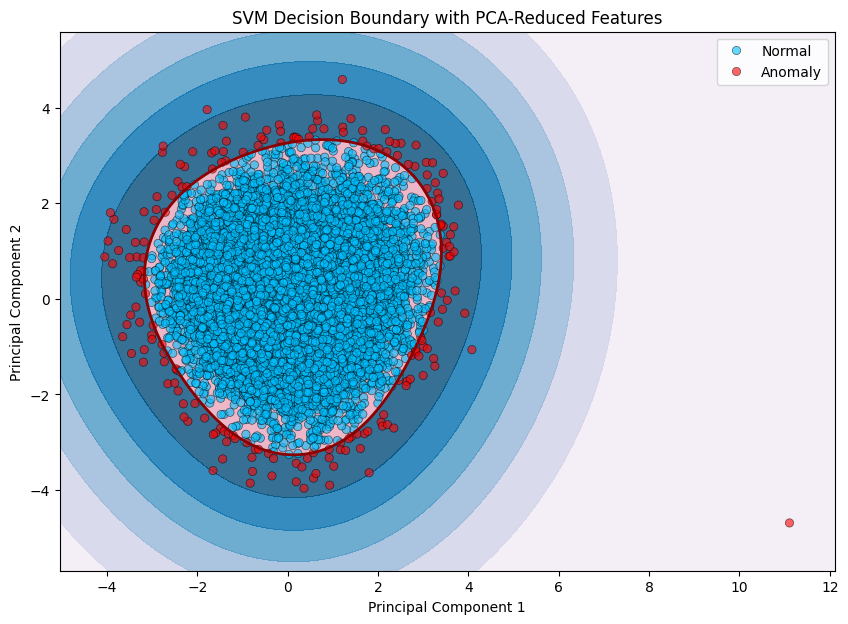

In [ ]:
# Reduce dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df3_scaled)  # Convert 6D to 2D

#  Fit the One-Class SVM
oc_svm = OneClassSVM(kernel='rbf', gamma=0.1, nu=0.01)
oc_svm.fit(X_pca)

# Visualize the SVM Decision Boundary
def plot_model(model, X_scaled, title):
    # Create a grid for the decision boundary
    xx, yy = np.meshgrid(np.linspace(X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1, 500),
                         np.linspace(X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1, 500))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Predict anomalies
    y_pred = model.predict(X_scaled)

    # Plot setup
    plt.figure(figsize=(10, 7))
    plt.title(title)

    # Plot decision function and boundary
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu, alpha=0.8)
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
    plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred', alpha=0.5)

    # Plot data points
    sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1],
                    hue=np.where(y_pred == 1, 'Normal', 'Anomaly'),
                    palette={'Normal': 'deepskyblue', 'Anomaly': 'red'},
                    alpha=0.6, edgecolor='k')

    # Plot labels
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()

# Call the plotting function
plot_model(oc_svm, X_pca, "SVM Decision Boundary with PCA-Reduced Features")

*Figure 9*

A gamma of 0.1 and a nu of 0.01 provided an anomaly percentage of 1%, which is within the criteria.

# 3.4 Thoughts and observations

The strenghts of OC-SVM are that is has a customisable sensitivty, allowing for the hyperparameters to be adjusted so it can be fined tuned to fit the specfications, it's also very adept at handling datasets with many dimensions.

However, the hyperparameter tuning is trial and error and can take multiple attempt to obtain the specification desired. It is hard to visualise without using PCA. That being said, the graphs do provide an easy  interpreation of where the boundary of expected results would be and does appear to have worked succesfully.

If the company would want to implent this system wide, it would require more computation power.



# 4. Isolation Forest being used for outlier detection

**Desired anomaly percentage set at 3%**

In [ ]:
# create a fresh data frame
df4 = pd.read_csv(url)
df4.head()

Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0         682          2.391656       4.617196          2.848982   
1         605          5.466877       6.424361          5.727520   
2         658          3.434232       3.680896          1.678708   
3         749          2.094656       7.120927          1.639670   
4         676          3.538228       5.956472          3.225336   

   lub oil temp  Coolant temp  
0     76.272417     69.884609  
1     73.222679     74.907314  
2     88.089916     78.704806  
3     77.661625     82.386700  
4     75.226352     67.153220

Scaling step not required with Isolation forests.

In [ ]:
# Convert to DataFrame
df4 = pd.DataFrame(df4, columns=df_clean.columns, index=df_clean.index)

#set X
X4 = df4.values
df4

Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0             682          2.391656       4.617196          2.848982   
1             605          5.466877       6.424361          5.727520   
2             658          3.434232       3.680896          1.678708   
3             749          2.094656       7.120927          1.639670   
4             676          3.538228       5.956472          3.225336   
...           ...               ...            ...               ...   
19530         681          3.598792       7.300853          1.083391   
19531         580          2.243040       5.242489          1.471350   
19532         616          3.310048       3.787693          6.001031   
19533        1163          2.731726       3.703595          2.951684   
19534         695          2.515089       6.355462          2.688567   

       lub oil temp  Coolant temp  
0         76.272417     69.884609  
1         73.222679     74.907314  
2         88.089916     78.704806  
3         77.661625     82.386700  
4         75.226352     67.153220  
...             ...           ...  
19530     76.206955     69.848780  
19531     76.884907     87.098119  
19532     75.889810     72.220009  
19533     76.784626     81.400088  
19534     77.555918     71.156081  

[19535 rows x 6 columns]

In [ ]:
# Initialize and fit Isolation Forest
iso_forest = IsolationForest(n_estimators=150, contamination=0.03, random_state=420) # contaminations sets the proportion of outliers desired.
iso_forest.fit(X4)

IsolationForest(contamination=0.03, n_estimators=150, random_state=23)

In [ ]:
scores_pred = iso_forest.decision_function(X4) # anomaly scores
print(scores_pred)

[ 0.16219754 -0.00243518  0.05726332 ...  0.04333511  0.1316877
  0.16881399]


In [ ]:
# Predict the anomalies (1 for normal, -1 for anomaly).
y_pred = iso_forest.predict(X4)

# View output.
y_pred

array([ 1, -1,  1, ...,  1,  1,  1])

In [ ]:
# Add anomaly column to DataFrame.
df4['Anomaly'] = y_pred

# Analyse results, provide proportion of outlier to normal
print(df4['Anomaly'].value_counts(1))

Anomaly
 1    0.969951
-1    0.030049
Name: proportion, dtype: float64


In [ ]:
df4

Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0             682          2.391656       4.617196          2.848982   
1             605          5.466877       6.424361          5.727520   
2             658          3.434232       3.680896          1.678708   
3             749          2.094656       7.120927          1.639670   
4             676          3.538228       5.956472          3.225336   
...           ...               ...            ...               ...   
19530         681          3.598792       7.300853          1.083391   
19531         580          2.243040       5.242489          1.471350   
19532         616          3.310048       3.787693          6.001031   
19533        1163          2.731726       3.703595          2.951684   
19534         695          2.515089       6.355462          2.688567   

       lub oil temp  Coolant temp  Anomaly  
0         76.272417     69.884609        1  
1         73.222679     74.907314       -1  
2         88.089916     78.704806        1  
3         77.661625     82.386700        1  
4         75.226352     67.153220        1  
...             ...           ...      ...  
19530     76.206955     69.848780        1  
19531     76.884907     87.098119        1  
19532     75.889810     72.220009        1  
19533     76.784626     81.400088        1  
19534     77.555918     71.156081        1  

[19535 rows x 7 columns]

In [ ]:

# Perform PCA on the data without anomalies detected (df_clean)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_clean)  # Convert from 6D to 2D, use df_clean as no scaling requried for isolation

# Add the PCA results back to df4 to make it easier to plot with anomaly labels
df4['PCA1'] = X_pca[:, 0]
df4['PCA2'] = X_pca[:, 1]

df4


Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0             682          2.391656       4.617196          2.848982   
1             605          5.466877       6.424361          5.727520   
2             658          3.434232       3.680896          1.678708   
3             749          2.094656       7.120927          1.639670   
4             676          3.538228       5.956472          3.225336   
...           ...               ...            ...               ...   
19530         681          3.598792       7.300853          1.083391   
19531         580          2.243040       5.242489          1.471350   
19532         616          3.310048       3.787693          6.001031   
19533        1163          2.731726       3.703595          2.951684   
19534         695          2.515089       6.355462          2.688567   

       lub oil temp  Coolant temp  Anomaly        PCA1       PCA2  
0         76.272417     69.884609        1 -109.246011  -8.455946  
1         73.222679     74.907314       -1 -186.244395  -3.590962  
2         88.089916     78.704806        1 -133.232559   0.937271  
3         77.661625     82.386700        1  -42.236574   3.981817  
4         75.226352     67.153220        1 -115.248465 -11.271077  
...             ...           ...      ...         ...        ...  
19530     76.206955     69.848780        1 -110.245832  -8.581583  
19531     76.884907     87.098119        1 -211.233679   8.812252  
19532     75.889810     72.220009        1 -175.244816  -6.066939  
19533     76.784626     81.400088        1  371.762030   2.742888  
19534     77.555918     71.156081        1  -96.244367  -7.178463  

[19535 rows x 9 columns]

There is no need to run another Isolation Forest again on the PCA-reduced data, as there is already a performed anomaly detection in the 6-dimensional space. The anomalies identified earlier are valid and should be visualized in the reduced 2D space.

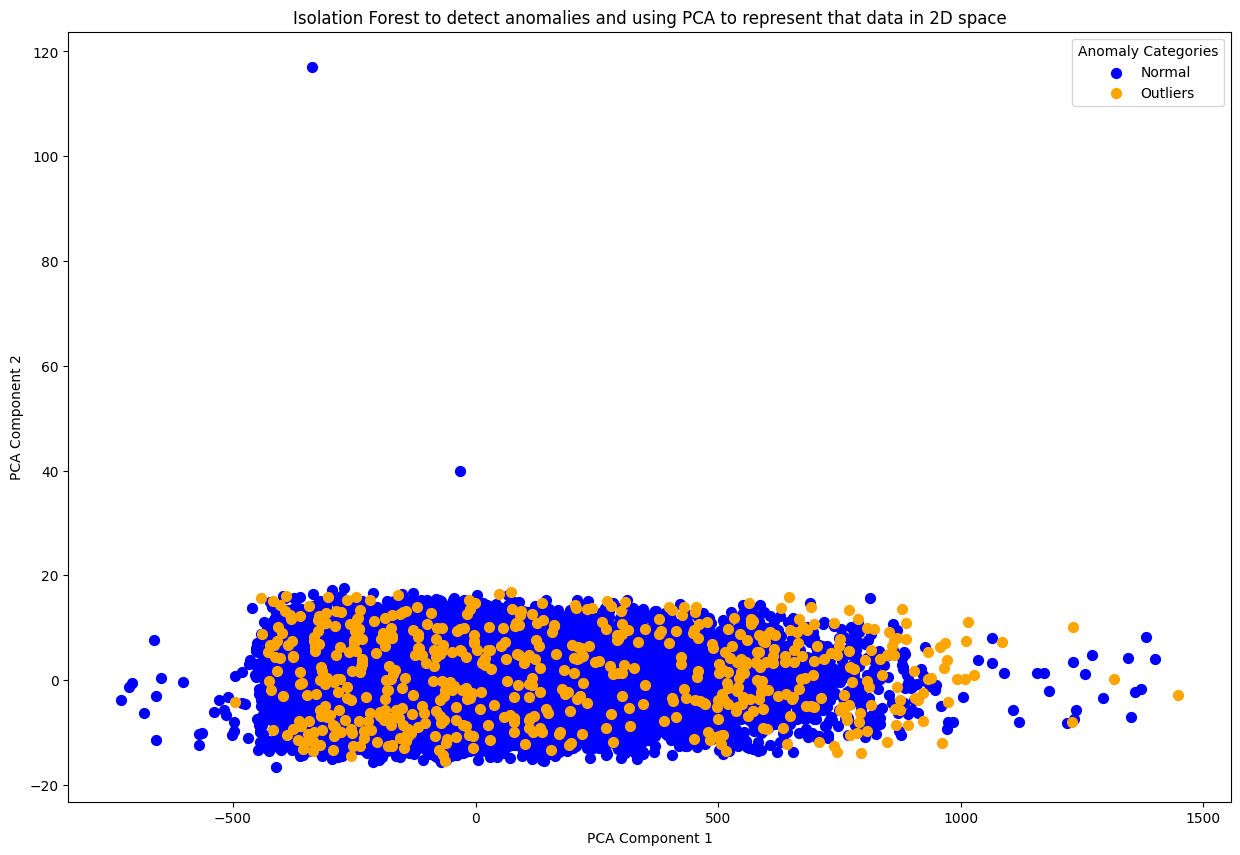

In [ ]:
# Plot the data points with anomaly labels
plt.figure(figsize=(15, 10))

# Normal points (Anomaly == 1) - Blue
plt.scatter(df4[df4['Anomaly'] == 1]['PCA1'],
            df4[df4['Anomaly'] == 1]['PCA2'],
            c='blue', s=50, label='Normal')  # Custom label for Normal points

# Outliers (Anomaly == -1) - Orange
plt.scatter(df4[df4['Anomaly'] == -1]['PCA1'],
            df4[df4['Anomaly'] == -1]['PCA2'],
            c='orange', s=50, label='Outliers')  # Custom label for Outliers


# Add labels and a color bar
plt.title("Isolation Forest to detect anomalies and using PCA to represent that data in 2D space")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Anomaly Categories')

plt.show()


*Figure 10*

# 4.2 Other outlier percentages

**Desired anomaly percentage set at 1%**

In [ ]:
# create a fresh data frame
df5 = pd.read_csv(url)
# Convert to DataFrame
df5 = pd.DataFrame(df4, columns=df_clean.columns, index=df_clean.index)

#set X
X5 = df5.values
# Initialize and fit Isolation Forest
iso_forest = IsolationForest(n_estimators=150, contamination=0.01, random_state=420) # contaminations sets the proportion of outliers desired.
iso_forest.fit(X5)

scores_pred_5 = iso_forest.decision_function(X5) # anomaly scores

# Predict the anomalies (1 for normal, -1 for anomaly).
y_pred_5 = iso_forest.predict(X5)

# View output.
y_pred_5

# Add anomaly column to DataFrame.
df5['Anomaly'] = y_pred_5

# Analyse results, provide proportion of outlier to normal
print(df5['Anomaly'].value_counts(1))

Anomaly
 1    0.989967
-1    0.010033
Name: proportion, dtype: float64


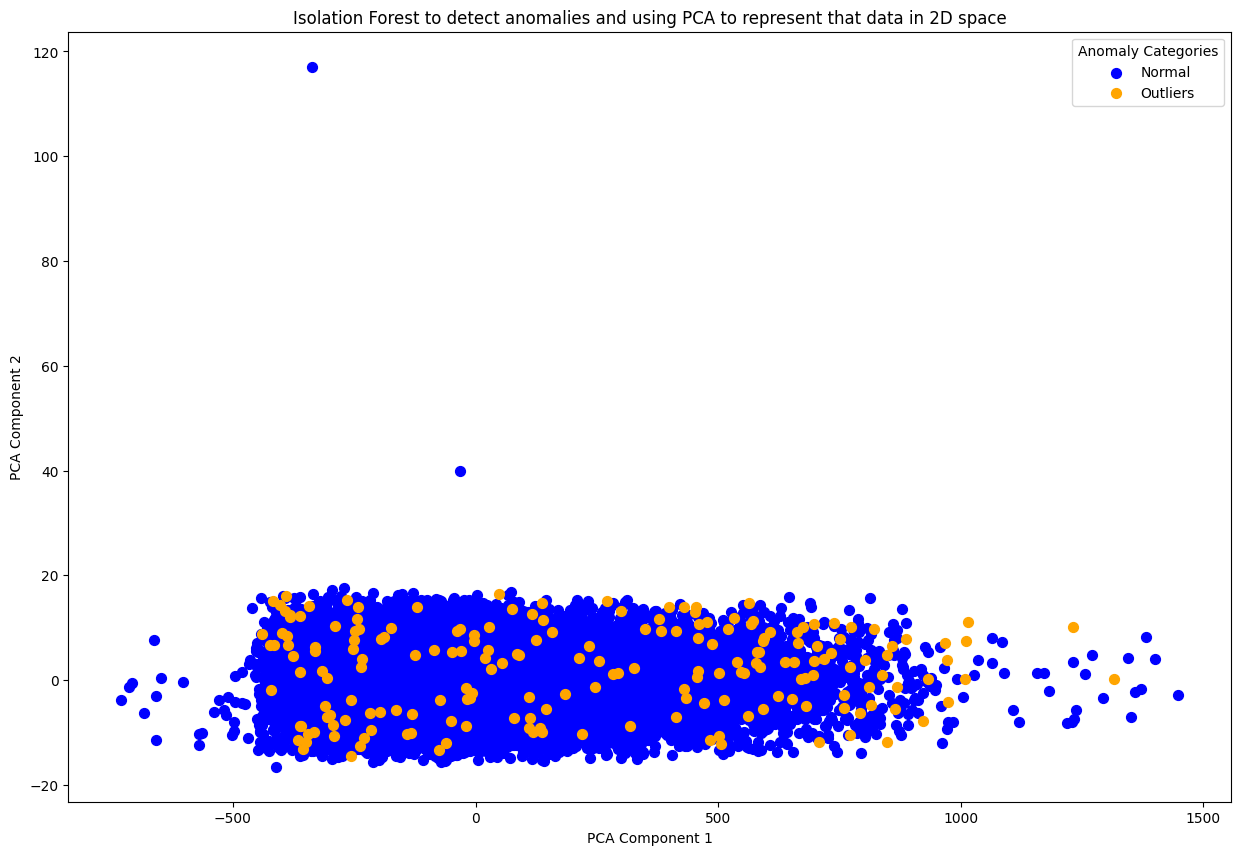

In [ ]:

# Perform PCA on the data without anomalies detected (df_clean)
pca = PCA(n_components=2)
X_pca5 = pca.fit_transform(df_clean)  # Convert from 6D to 2D, use df_clean as no scaling requried for isolation

# Add the PCA results back to df5 to make it easier to plot with anomaly labels
df5['PCA1'] = X_pca5[:, 0]
df5['PCA2'] = X_pca5[:, 1]

# Plot the data points with anomaly labels
plt.figure(figsize=(15, 10))

# Normal points (Anomaly == 1) - Blue
plt.scatter(df5[df5['Anomaly'] == 1]['PCA1'],
            df5[df5['Anomaly'] == 1]['PCA2'],
            c='blue', s=50, label='Normal')  # Custom label for Normal points

# Outliers (Anomaly == -1) - Orange
plt.scatter(df5[df5['Anomaly'] == -1]['PCA1'],
            df5[df5['Anomaly'] == -1]['PCA2'],
            c='orange', s=50, label='Outliers')  # Custom label for Outliers




# Add labels and a color bar
plt.title("Isolation Forest to detect anomalies and using PCA to represent that data in 2D space")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Anomaly Categories')

plt.show()



*Figure 11*

**Desired anomaly percentage set at 5%**

In [ ]:
# create a fresh data frame
df6 = pd.read_csv(url)
# Convert to DataFrame
df6 = pd.DataFrame(df4, columns=df_clean.columns, index=df_clean.index)

#set X
X6 = df6.values
# Initialize and fit Isolation Forest
iso_forest = IsolationForest(n_estimators=150, contamination=0.05, random_state=420) # contaminations sets the proportion of outliers desired.
iso_forest.fit(X6)

scores_pred_6 = iso_forest.decision_function(X6) # anomaly scores

# Predict the anomalies (1 for normal, -1 for anomaly).
y_pred_6 = iso_forest.predict(X6)

# View output.
y_pred_6

# Add anomaly column to DataFrame.
df6['Anomaly'] = y_pred_6

# Analyse results, provide proportion of outlier to normal
print(df6['Anomaly'].value_counts(1))

Anomaly
 1    0.949987
-1    0.050013
Name: proportion, dtype: float64


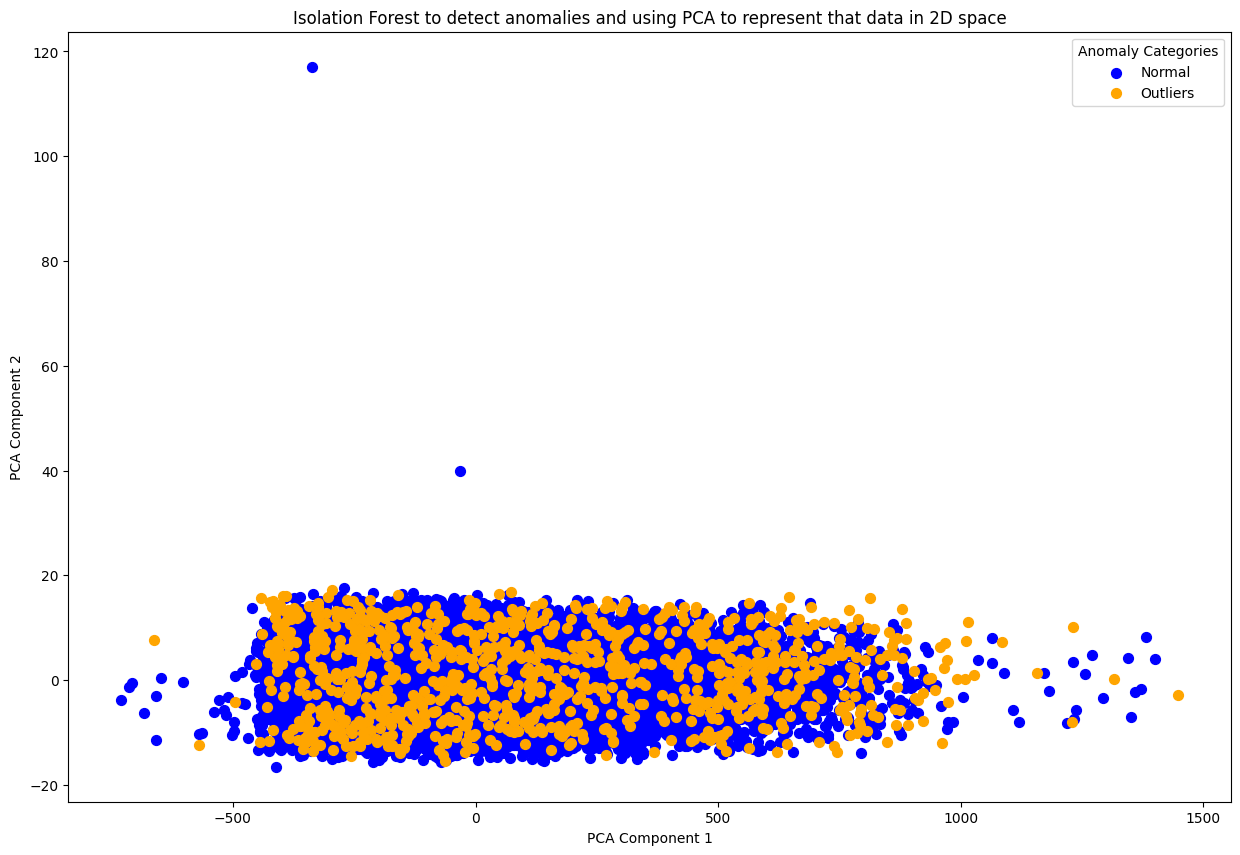

In [ ]:

# Perform PCA on the data without anomalies detected (df_clean)
pca = PCA(n_components=2)
X_pca6 = pca.fit_transform(df_clean)  # Convert from 6D to 2D, use df_clean as no scaling requried for isolation

# Add the PCA results back to df5 to make it easier to plot with anomaly labels
df6['PCA1'] = X_pca6[:, 0]
df6['PCA2'] = X_pca6[:, 1]

# Visualize the data with proper colors for anomalies and normal points.
plt.figure(figsize=(15, 10))

# Normal points (Anomaly == 1) - Blue
plt.scatter(df6[df6['Anomaly'] == 1]['PCA1'],
            df6[df6['Anomaly'] == 1]['PCA2'],
            c='blue', s=50, label='Normal')  # Custom label for Normal points

# Outliers (Anomaly == -1) - Orange
plt.scatter(df6[df6['Anomaly'] == -1]['PCA1'],
            df6[df6['Anomaly'] == -1]['PCA2'],
            c='orange', s=50, label='Outliers')  # Custom label for Outliers



# Add labels and a color bar
plt.title("Isolation Forest to detect anomalies and using PCA to represent that data in 2D space")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Anomaly Categories')

plt.show()



*Figure 12*

# 4.3 Thoughts and observations

Isolation forests strengths are that it is very scalable, data is not required to follow a distribution and is widely unaffected by noise.

It's issues are that there is a degree of randomness, however this can be limited by uthe random_state command. And the data can be hard to interpret even when graphed.

This is likely the best case option explored, as the boxplot showed earlier the anomalies are well-separated from the main data, which is ideal for isolation forests, it can handle large scale data if the business wishes to implent this detection across all ships and the business can set the percentage of anomalies desired.

# Reflect

Write a brief paragraph highlighting your process and the rationale to showcase critical thinking and problem-solving.

> Select the pen from the toolbar to add your entry.

### Reference:
Devabrat, M., 2022. Predictive Maintenance on Ship's Main Engine using AI. Available at: https://dx.doi.org/10.21227/g3za-v415. [Accessed 5 March 2024]